In [ ]:
# importing dataset
import pandas as pd
eazydiner_data=pd.read_csv("/content/eazydiner_data_main (2).csv")

In [ ]:
eazydiner_data

,Category,restuaurants,rating,location_data,food_price,offer_data,food_item
0,lunch,The Ofen,5.0,Banjara Hills,2000,45% Off,"Mexican, Italian, Beverages"
1,lunch,Forefathers,4.5,Jubilee Hills,1500,25% Off,Multicuisine
2,lunch,Tevar - The Progressive Indian Kitchen & Bar,4.1,Hitech City,4000,25% Off,Modern Indian
3,lunch,One8 Commune,4.7,Hitech City,2500,25% Off,Multicuisine
4,lunch,Aster Cafe & Kitchen,4.0,Banjara Hills,1000,40% Off,Multicuisine
...,...,...,...,...,...,...,...
695,breakfast,Marley's Joint,3.6,Secunderabad,700,35% Off,Multicuisine
696,breakfast,Ukusa,4.8,Jubilee Hills,800,35% Off,Multicuisine
697,breakfast,Ambali Gampa,3.4,Hotel Taar Tangerine,1400,35% Off,Multicuisine
698,breakfast,Cafe Baatakani,4.5,L B Nagar,1000,35% Off,Multicuisine


In [ ]:
eazydiner_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Category       700 non-null    category
 1   restuaurants   700 non-null    object  
 2   rating         699 non-null    float64 
 3   location_data  700 non-null    object  
 4   food_price     700 non-null    int64   
 5   offer_data     700 non-null    category
 6   food_item      700 non-null    object  
dtypes: category(2), float64(1), int64(1), object(3)
memory usage: 29.4+ KB


In [ ]:
eazydiner_data['offer_data']=eazydiner_data['offer_data'].astype('category')

In [ ]:
eazydiner_data['Category']=eazydiner_data['Category'].astype('category')

In [ ]:
eazydiner_data['food_price']=eazydiner_data['food_price'].astype('category')


In [ ]:
eazydiner_data['rating']=pd.to_numeric(eazydiner_data['rating'], errors='coerce')
eazydiner_data['rating']=eazydiner_data['rating'].astype('float')

In [ ]:
eazydiner_data['location_data'].unique()

array(['Banjara Hills', 'Jubilee Hills', 'Hitech City', 'ITC Kohenur',
       'Habsiguda', 'Radisson Blu Plaza Hotel', 'Somajiguda',
       'Aditya Park', 'The Park', 'Necklace Road', 'The Golkonda Hotel',
       'Hyatt Place Hyderabad Banjara Hills', 'Park Hyatt', 'Tolichowki',
       'Panjagutta', 'Courtyard By Marriott', 'Film Nagar',
       'Mercure Hyderabad KCP', 'Ameerpet', 'Best Western Ashoka',
       'Lakdikapul', 'Madhapur', 'Khairatabad', 'Park Continental',
       'Punjagutta', 'ITC Kakatiya', 'Yousufguda', 'The Leela Hyderabad',
       'Hyderabad Marriott Hotel & Convention Centre', 'Kondapur',
       'Ibis Hotel', 'Amberpet', 'Hotel Central Park', 'Himayath Nagar',
       'Kukatpally', 'Kompally', 'Gachibowli', 'Begumpet', 'Hotel Kass',
       'Royalton Hotel', 'The Peerless Inn', 'L B Nagar', 'Manikonda',
       'Nanakramguda', 'Bachupally', 'Financial District', 'Secunderabad',
       'Radisson Hyderabad Hitec City', 'Le Méridien Hyderabad',
       'The Westin Hyderaba

In [ ]:
eazydiner_data['location_data']=eazydiner_data['location_data'].replace('Hyatt Place Hyderabad Banjara Hills','Banjara Hills')

In [ ]:
eazydiner_data['location_data']=eazydiner_data['location_data'].replace('Hotel Jubilee Ridge','Jubilee Hills')

# **univariate analysis**

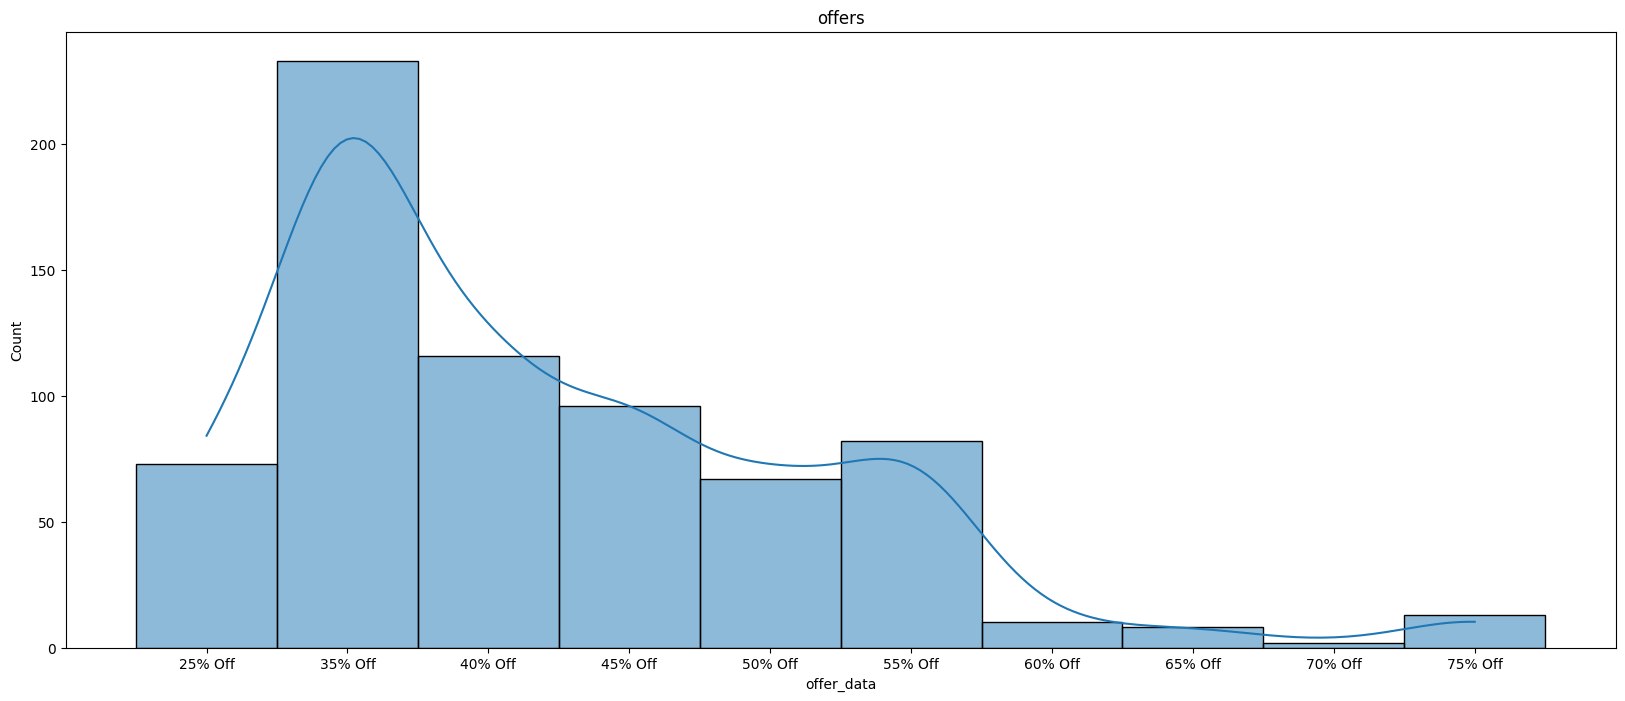

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

sns.histplot(eazydiner_data['offer_data'],bins=4,kde=True)
plt.title("offers")
plt.show()

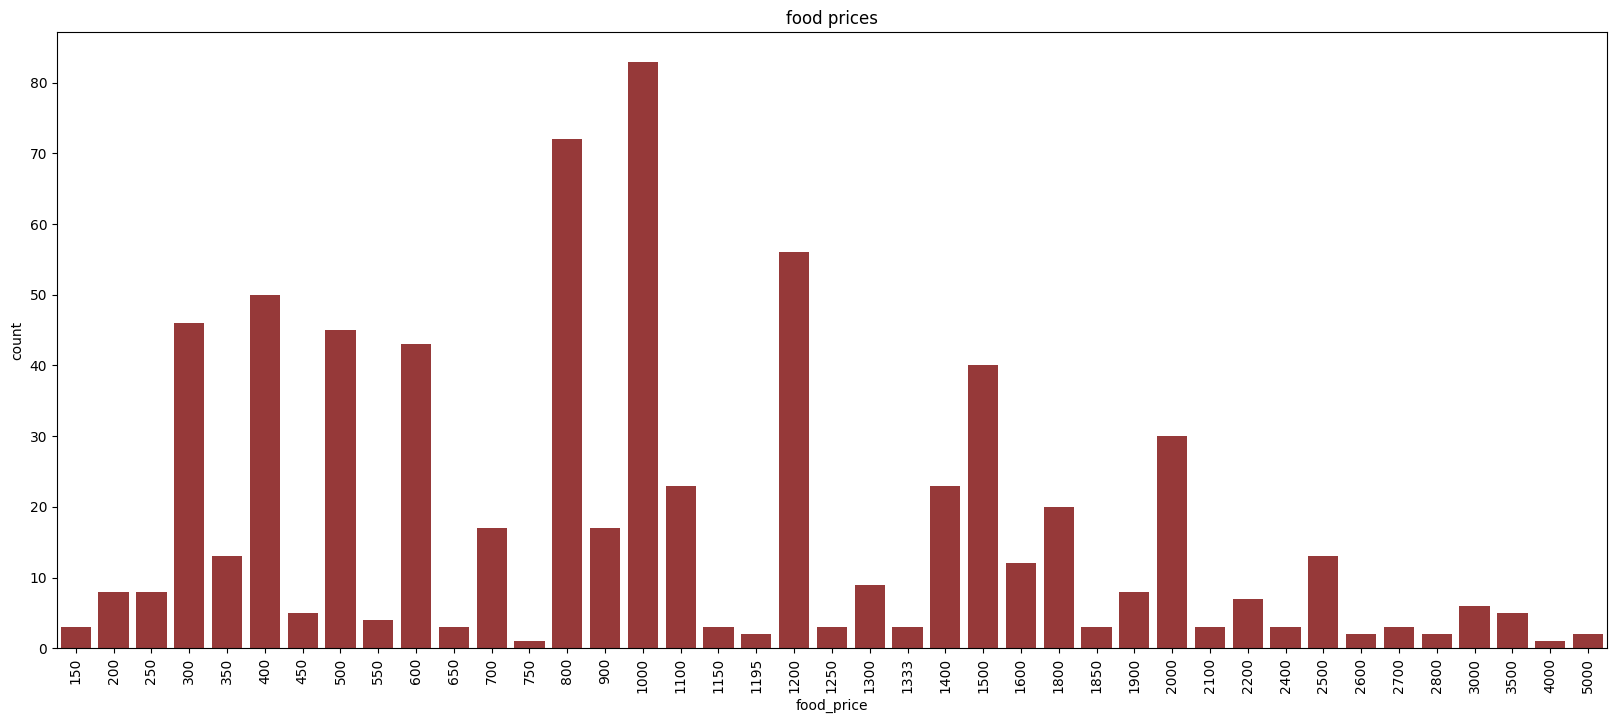

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.countplot(data=eazydiner_data,x='food_price',color='brown')
plt.title("food prices")
plt.xticks(rotation=90)
plt.show()

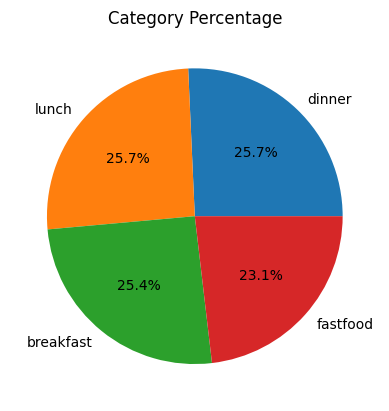

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Category' to object type, fill missing values, and then convert back to category
univar1 = eazydiner_data['Category'].astype('object').fillna('Unknown').astype('category')

univar1.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Category Percentage")
plt.ylabel('') # Remove default y-label
plt.show()

# **bivariate analysis**

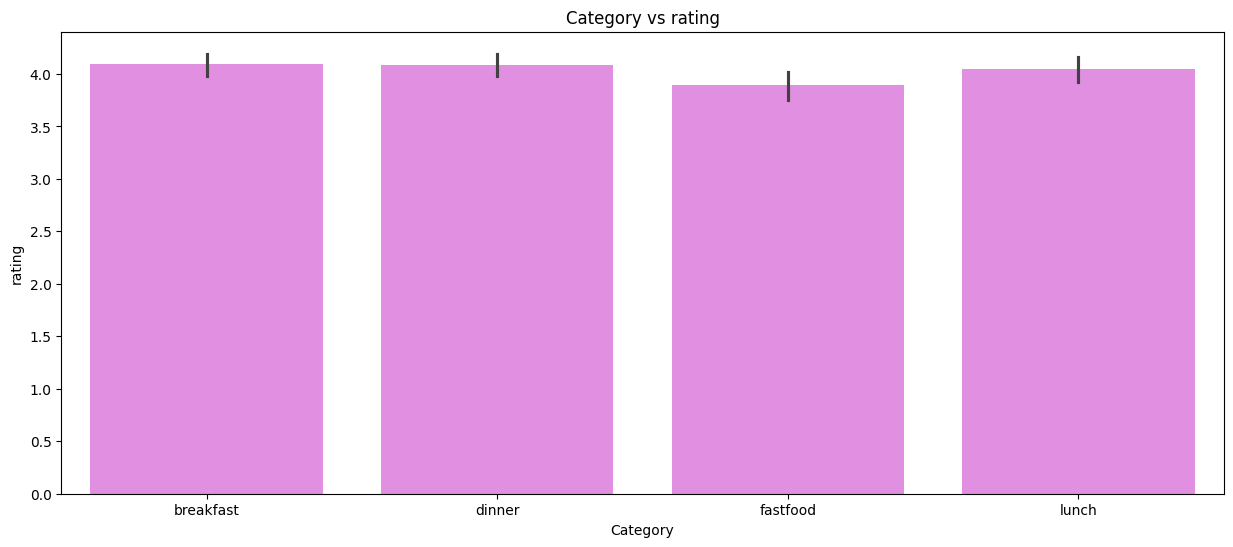

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.barplot(data=eazydiner_data,x='Category',y='rating',color='violet')
plt.title("Category vs rating")
plt.xlabel('Category')
plt.ylabel('rating')
plt.xticks
plt.show()

<Axes: ylabel='Category'>

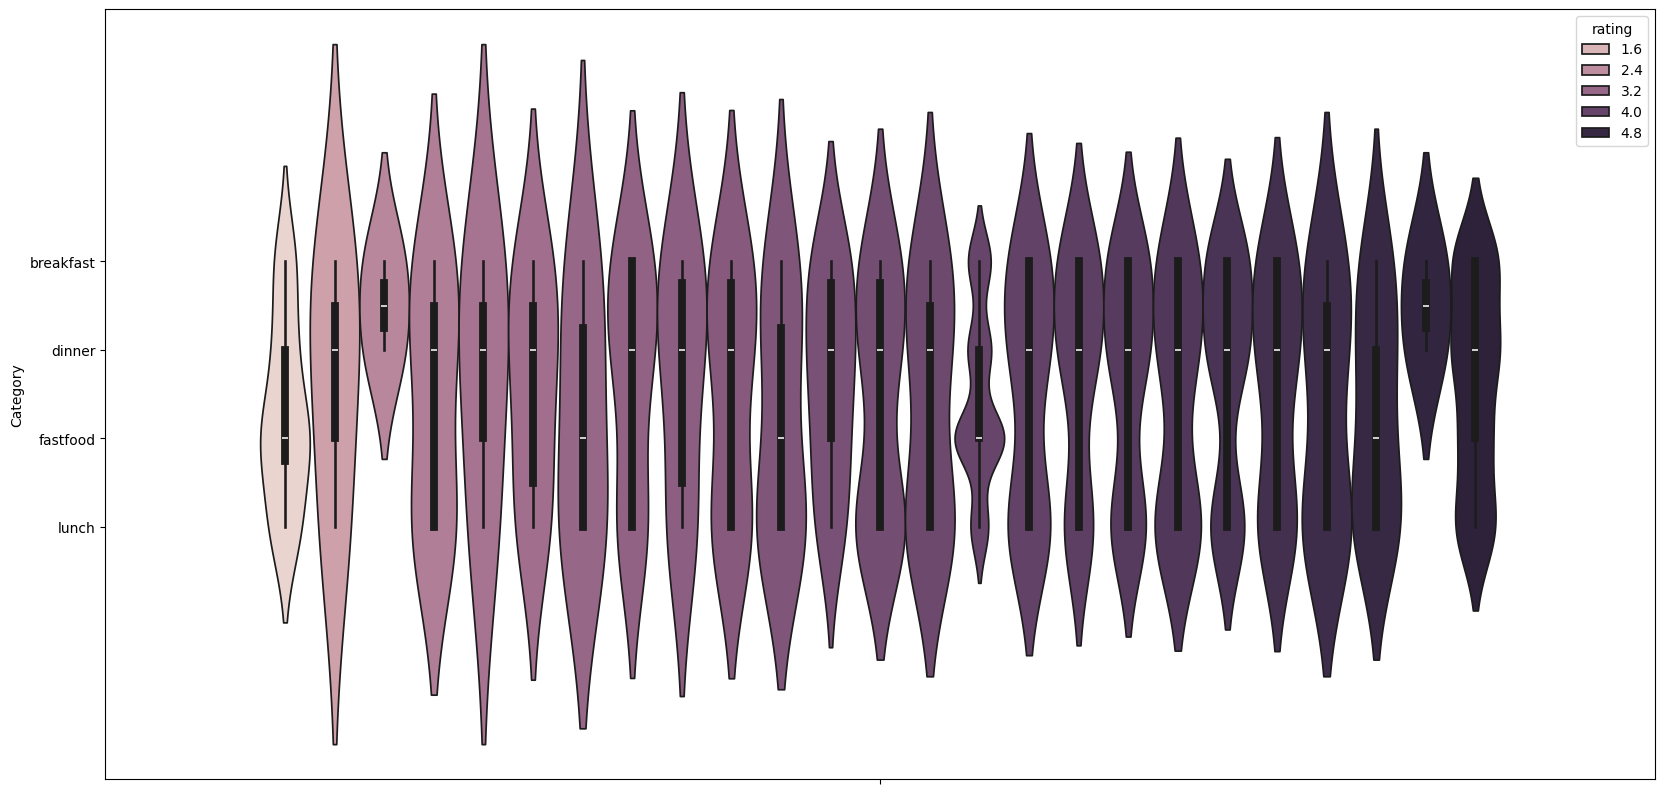

In [ ]:
plt.figure(figsize=(20,10))
sns.violinplot(data=eazydiner_data,y='Category',hue='rating')

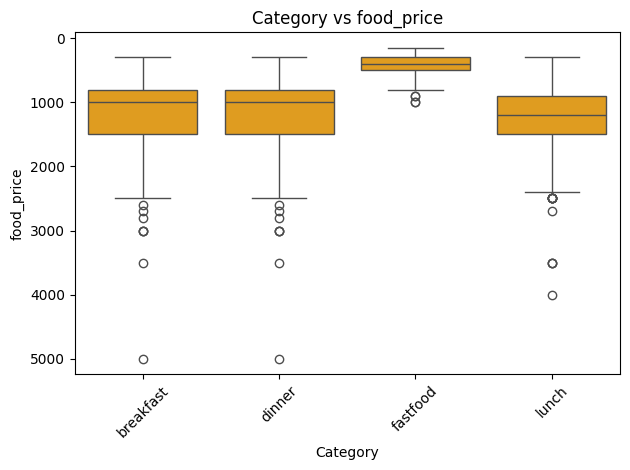

In [ ]:
sns.boxplot(data=eazydiner_data,x='Category',y='food_price',color="orange")
plt.title("Category vs food_price")
plt.xlabel('Category')
plt.ylabel('food_price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

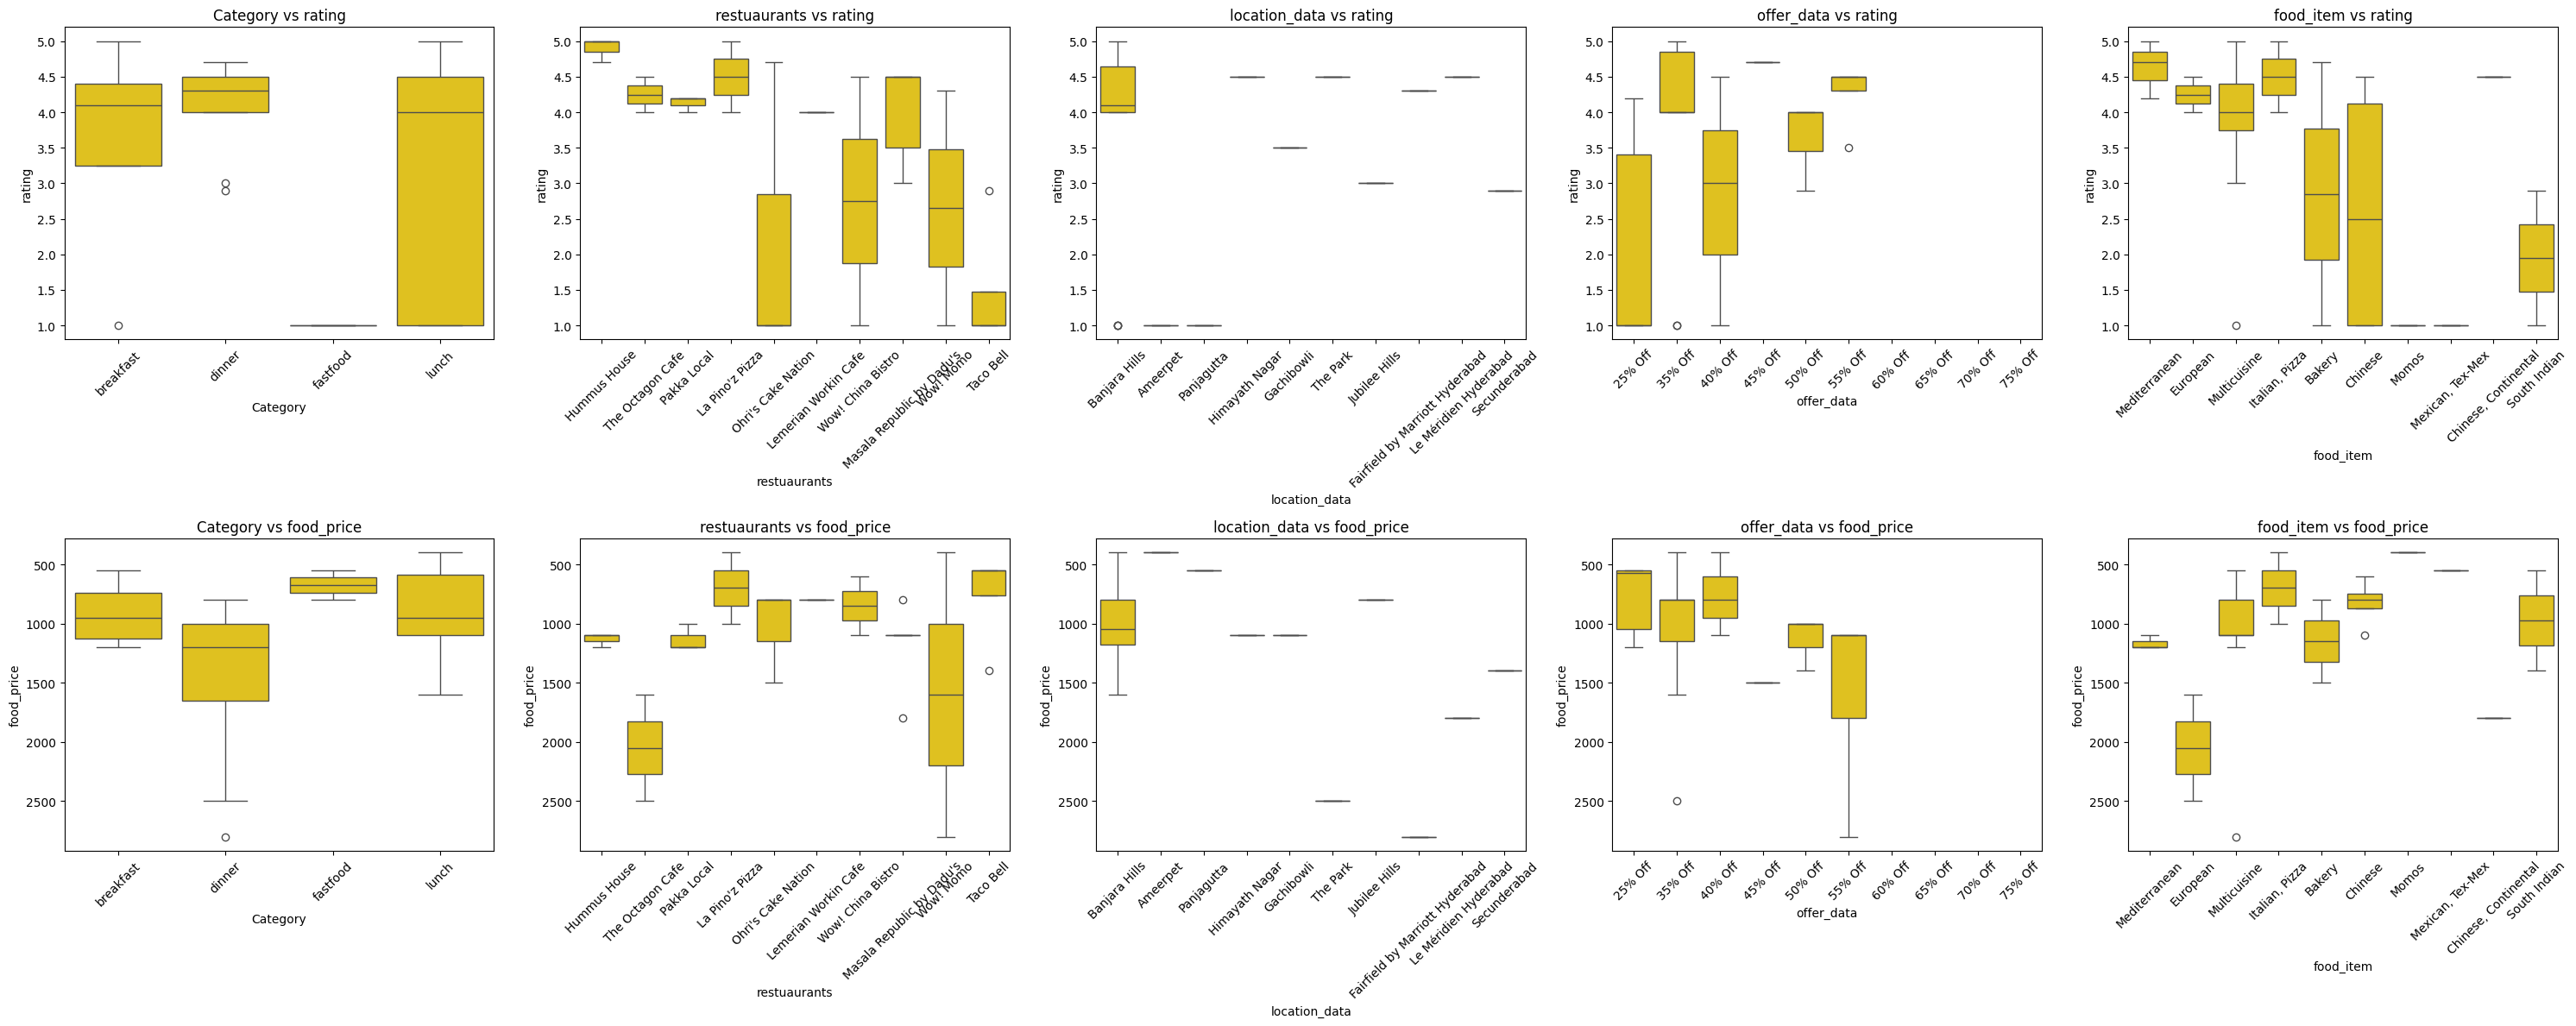

In [ ]:

df_filtered = eazydiner_data.copy()

high_card_cols = ['restuaurants', 'location_data', 'food_item']

for col in high_card_cols:
    top_n = df_filtered[col].value_counts().nlargest(10).index
    df_filtered = df_filtered[df_filtered[col].isin(top_n)]

import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Category', 'restuaurants', 'location_data', 'offer_data', 'food_item']
numeric_cols = ['rating', 'food_price']

plt.figure(figsize=(30, 12))
plot_number = 1

for num_col in numeric_cols:
    for cat_col in categorical_cols:
        plt.subplot(2, 5, plot_number)
        sns.boxplot(data=df_filtered, x=cat_col, y=num_col,color="gold")
        plt.xticks(rotation=45)
        plt.title(f'{cat_col} vs {num_col}')
        plot_number += 1

plt.tight_layout()
plt.show()



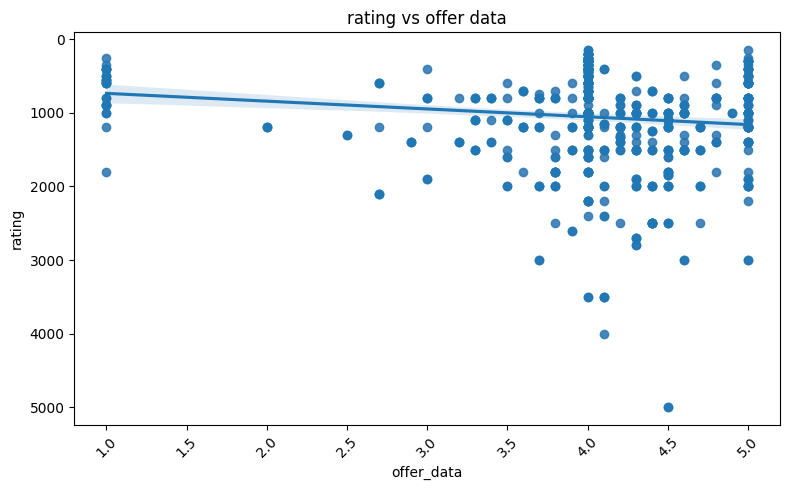

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=eazydiner_data,x='rating',y='food_price',color="pink")
sns.regplot(data=eazydiner_data,x='rating',y='food_price')
plt.title("rating vs offer data")
plt.xlabel("offer_data")
plt.ylabel("rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-45-1564931974.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:violet'` for the same effect.

  sns.barplot(data=eazydiner_data,x='rating',y='offer_data', hue='offer_data', color ='violet')


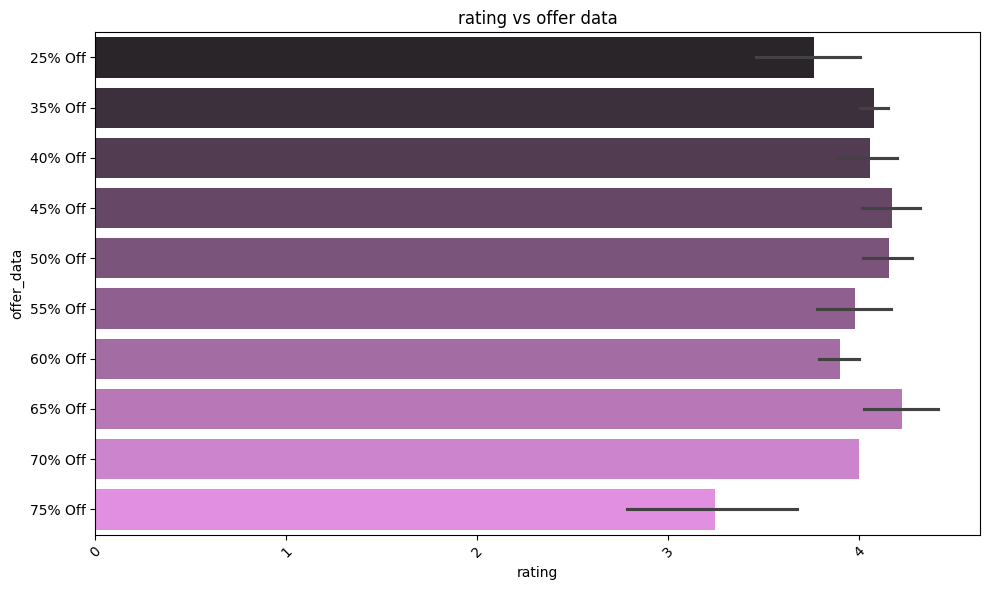

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=eazydiner_data,x='rating',y='offer_data', hue='offer_data', color ='violet')
plt.title("rating vs offer data")
plt.xlabel("rating")
plt.ylabel("offer_data")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

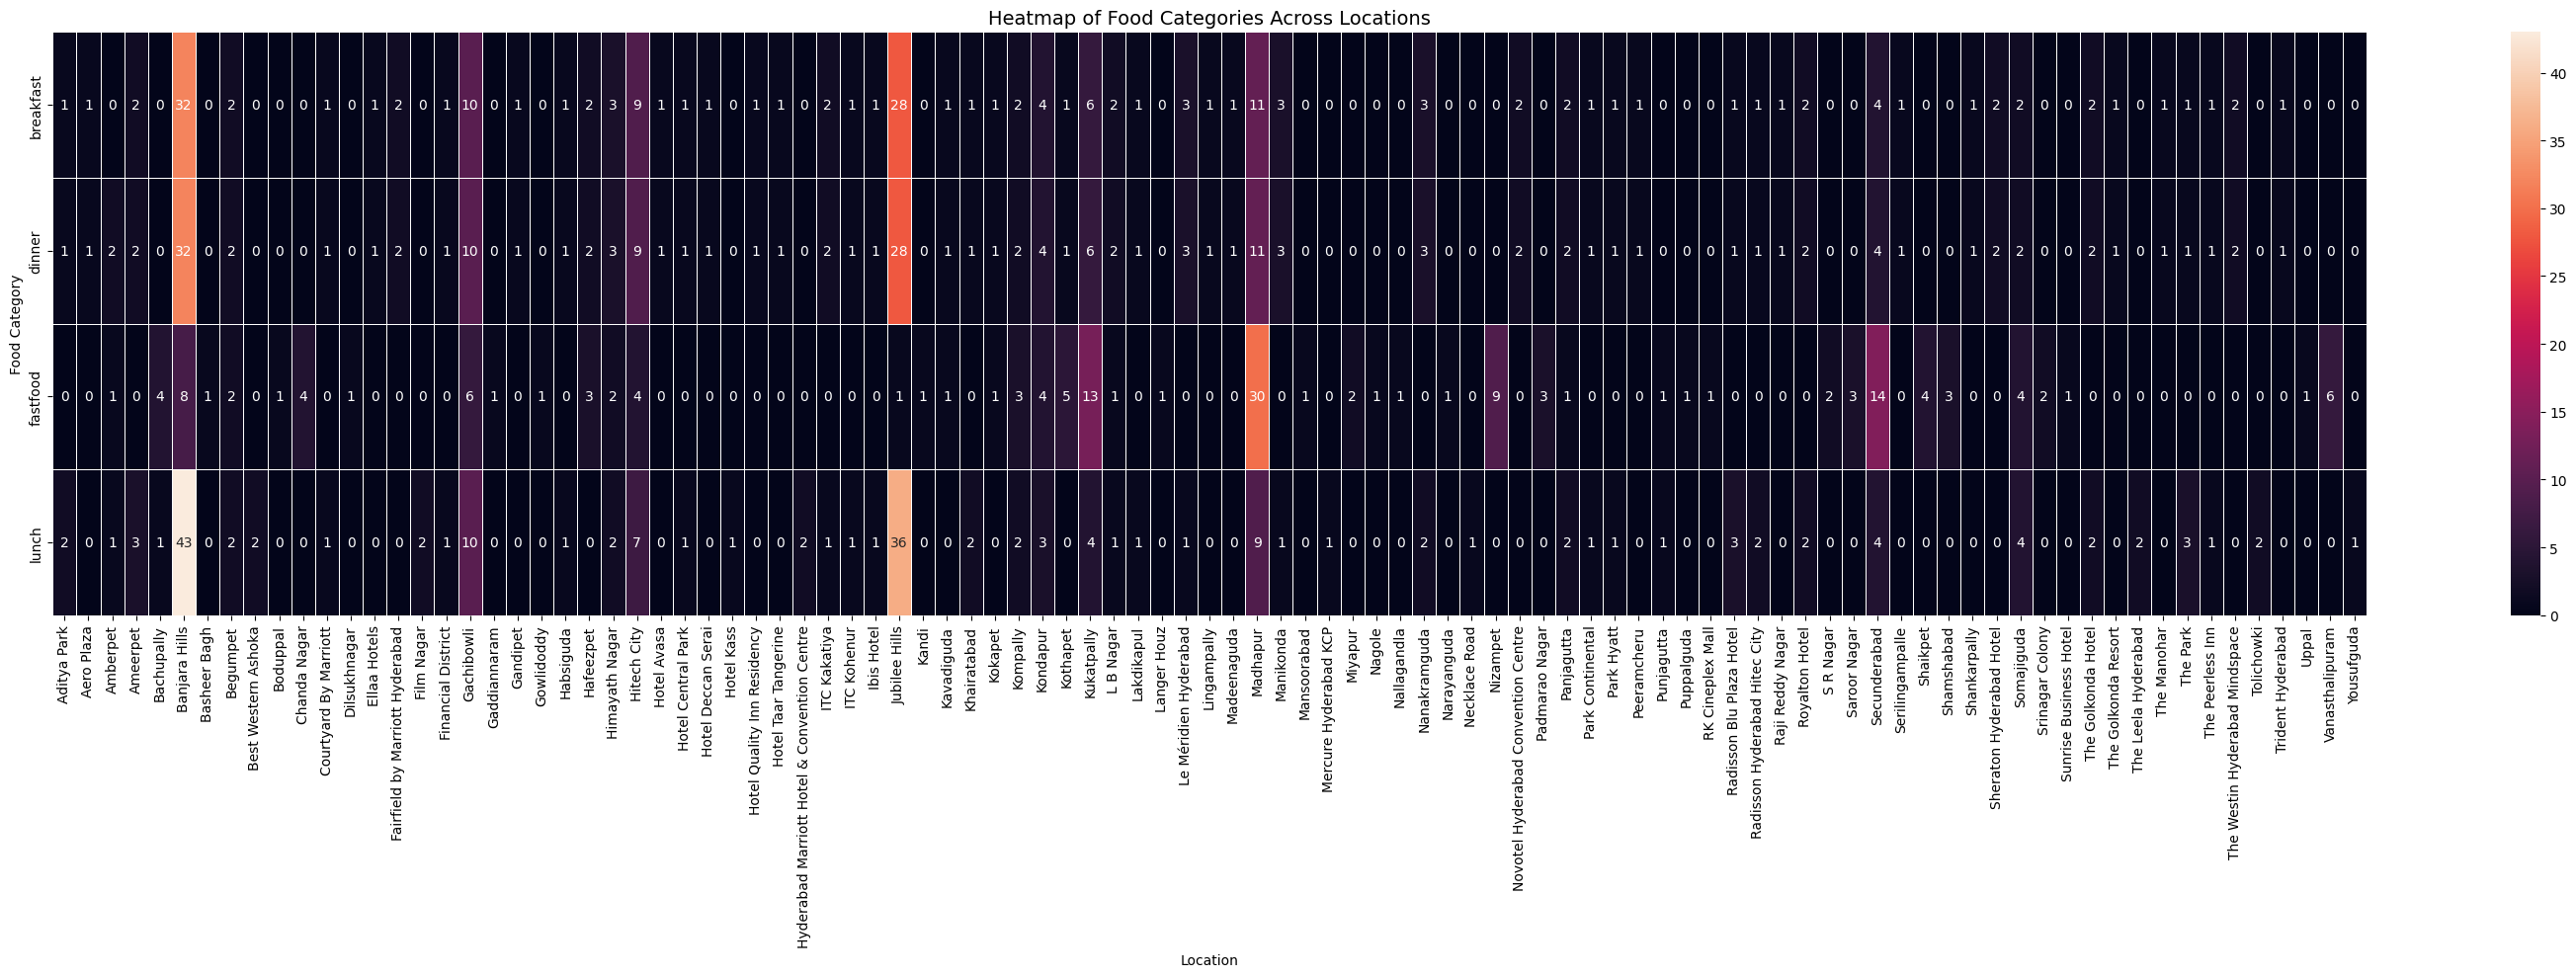

In [ ]:
cross = pd.crosstab(eazydiner_data['Category'], eazydiner_data['location_data'])
cross.columns.name = None
cross = cross.reset_index()
plt.figure(figsize=(30, 10))
sns.heatmap(cross.set_index('Category'), annot=True, linewidths=0.5)
plt.title("Heatmap of Food Categories Across Locations", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Food Category")
plt.tight_layout()
plt.show()

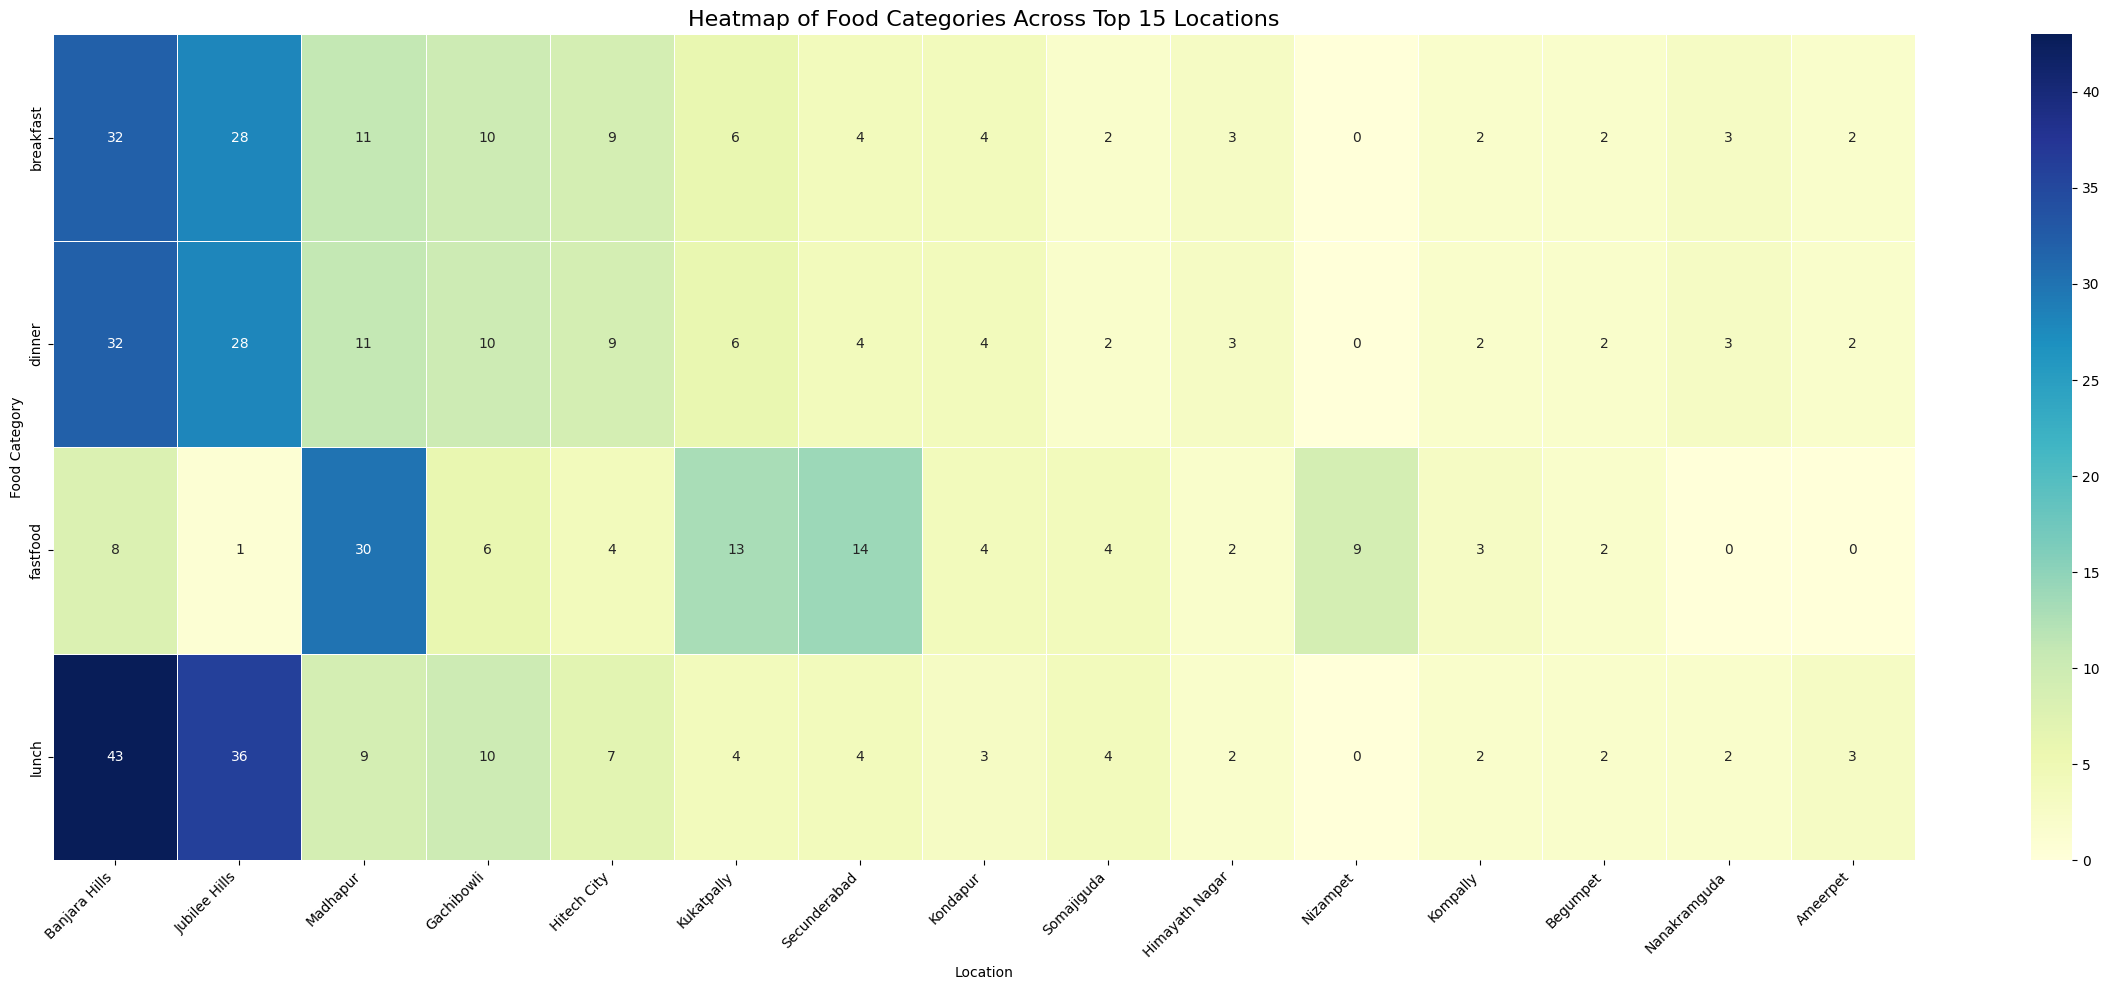

In [ ]:
plt.figure(figsize=(24, 10))

top_locations = cross.drop('Category', axis=1).sum().sort_values(ascending=False).head(15).index
filtered_cross = cross[['Category'] + list(top_locations)]

sns.heatmap(filtered_cross.set_index('Category'), annot=True, cmap='YlGnBu', linewidths=0.5)


plt.title("Heatmap of Food Categories Across Top 15 Locations", fontsize=16)
plt.xlabel("Location")
plt.ylabel("Food Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **multi variate analysis**

/tmp/ipython-input-23-626713696.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mul1=eazydiner_data.groupby(['Category','rating'])['location_data'].value_counts().sort_values().tail(10).reset_index()


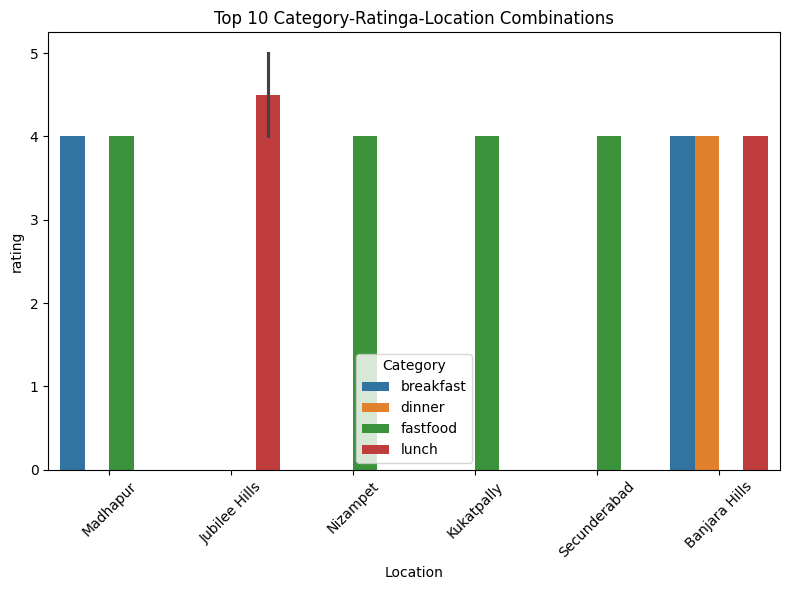

In [ ]:
mul1=eazydiner_data.groupby(['Category','rating'])['location_data'].value_counts().sort_values().tail(10).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=mul1, x='location_data', y='rating', hue='Category')

plt.title("Top 10 Category-Ratinga-Location Combinations")
plt.xlabel("Location")
plt.ylabel("rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='offer_data', ylabel='rating'>

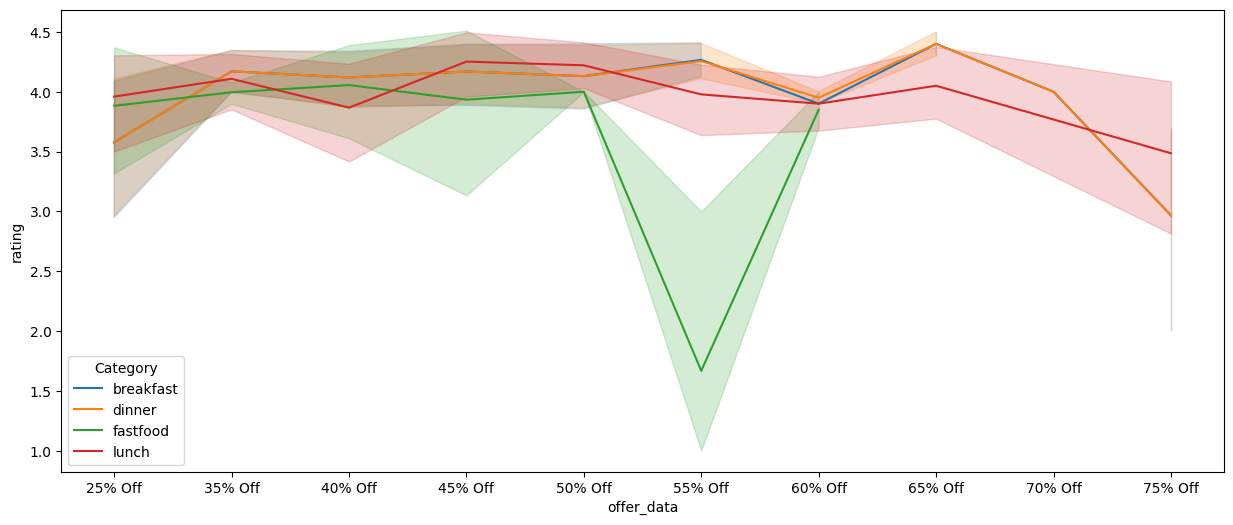

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=eazydiner_data, x='offer_data', y='rating', hue='Category')


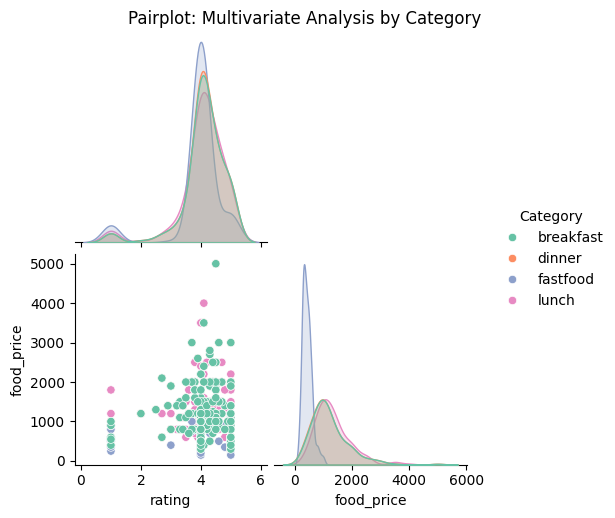

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pairplot_data = eazydiner_data[['rating', 'food_price', 'Category']].copy()

pairplot_data['rating'] = pd.to_numeric(pairplot_data['rating'], errors='coerce')
pairplot_data['food_price'] = pd.to_numeric(pairplot_data['food_price'], errors='coerce')

pairplot_data.dropna(inplace=True)

# Plot
sns.pairplot(pairplot_data, hue='Category', corner=True, palette='Set2')
plt.suptitle("Pairplot: Multivariate Analysis by Category", y=1.02)
plt.show()

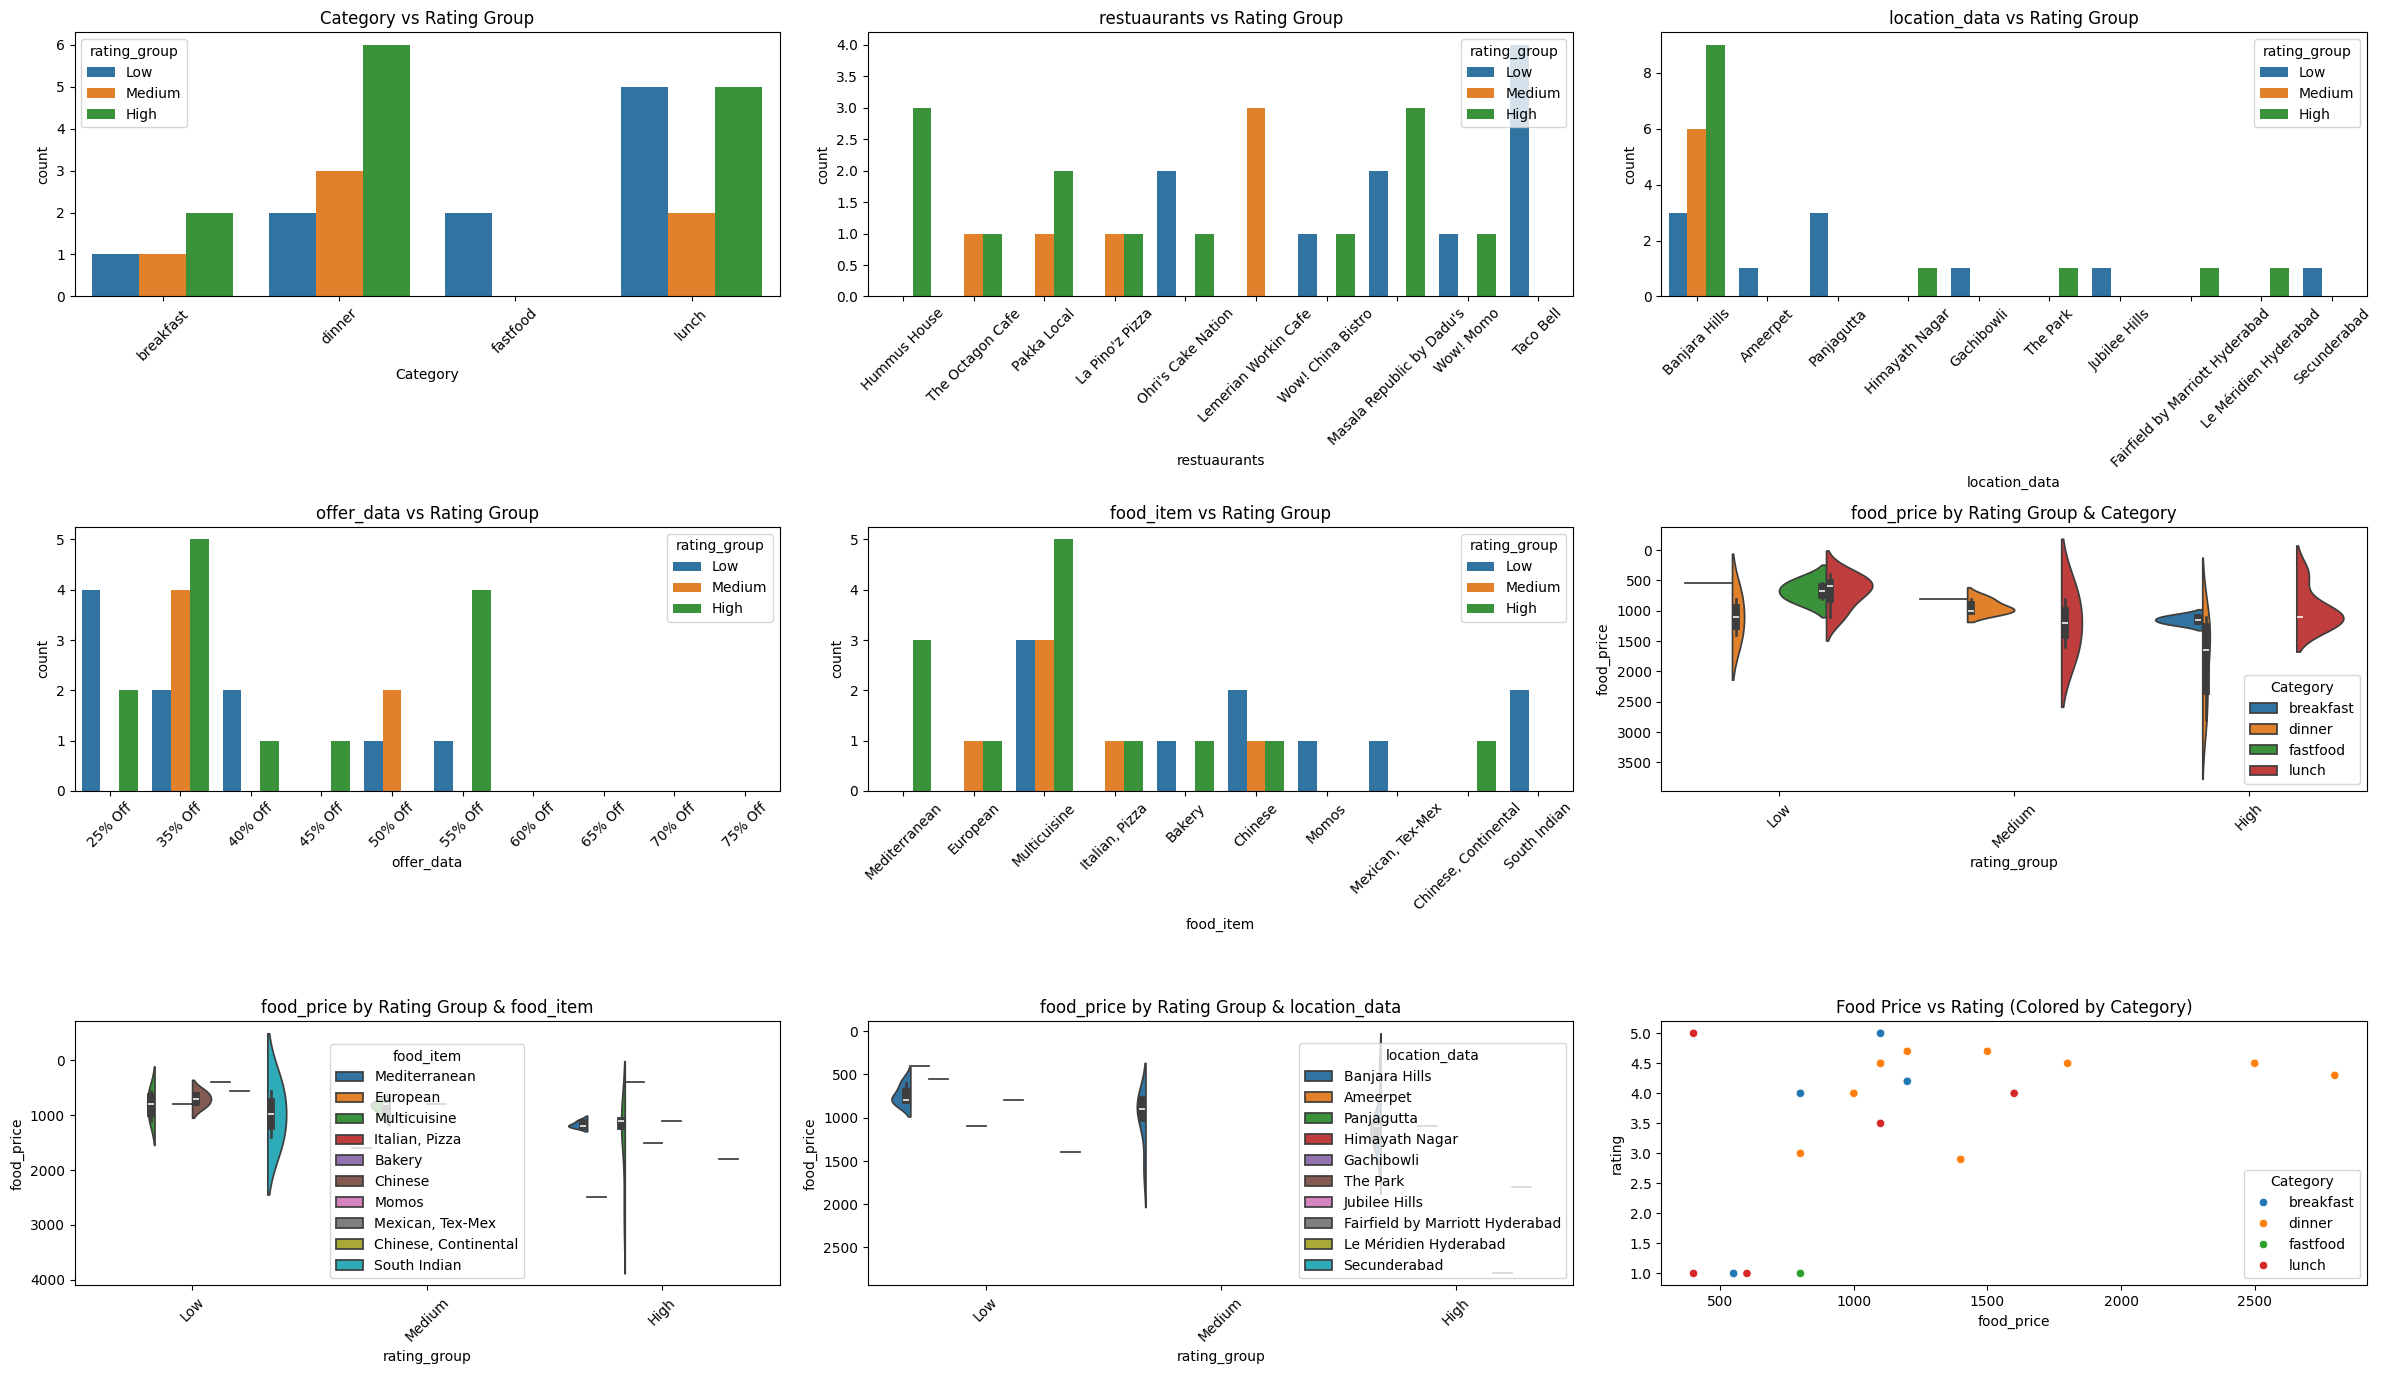

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Copy original data
df = eazydiner_data.copy()

# Step 2: Filter top 10 values for high-cardinality columns
high_card_cols = ['restuaurants', 'location_data', 'food_item']
for col in high_card_cols:
    top_vals = df[col].value_counts().nlargest(10).index
    df = df[df[col].isin(top_vals)]

# Step 3: Bin the 'rating' column into Low, Medium, High groups
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now safely bin the ratings
df['rating_group'] = pd.cut(df['rating'],
                            bins=[0, 3.5, 4.0, 5],
                            labels=['Low', 'Medium', 'High'])

# Step 4: Define columns to use
categorical_cols = ['Category', 'restuaurants', 'location_data', 'offer_data', 'food_item']
numerical_cols = ['food_price']  # We already binned 'rating'

# Step 5: Plot — Mix of countplots, violinplots, and scatterplot
plt.figure(figsize=(24, 18))
plot_num = 1

# Plot 1–5: Countplot of each categorical feature vs rating_group
for cat_col in categorical_cols:
    plt.subplot(4, 3, plot_num)
    sns.countplot(data=df, x=cat_col, hue='rating_group')
    plt.title(f'{cat_col} vs Rating Group')
    plt.xticks(rotation=45)
    plot_num += 1

# Plot 6–8: Violinplot for numerical vs category, split by rating_group
for num_col in numerical_cols:
    for cat_col in ['Category', 'food_item', 'location_data']:
        plt.subplot(4, 3, plot_num)
        sns.violinplot(data=df, x='rating_group', y=num_col, hue=cat_col, split=True)
        plt.title(f'{num_col} by Rating Group & {cat_col}')
        plt.xticks(rotation=45)
        plot_num += 1

# Plot 9: Scatterplot for food_price vs rating (hue=Category)
plt.subplot(4, 3, plot_num)
sns.scatterplot(data=df, x='food_price', y='rating', hue='Category')
plt.title("Food Price vs Rating (Colored by Category)")
plot_num += 1

plt.tight_layout()
plt.show()



In [ ]:
# Convert 'food_price' to numeric before filtering
eazydiner_data['food_price'] = pd.to_numeric(eazydiner_data['food_price'], errors='coerce')

# Now filter the DataFrame
eazydiner_data[(eazydiner_data['food_price'] < 400) & (eazydiner_data['rating']==5.0)]

,Category,restuaurants,rating,location_data,food_price,offer_data,food_item
292,dinner,Chandra Haveli,5.0,Kavadiguda,300,40% Off,"Finger Food, Cocktail Menu"
374,fastfood,Chai Point,5.0,Banjara Hills,250,25% Off,Fast Food
390,fastfood,Wow! Chicken,5.0,Kavadiguda,300,40% Off,South Indian
396,fastfood,TOC Bakers,5.0,Narayanguda,300,35% Off,Italian
417,fastfood,Organic Kitchen,5.0,Chanda Nagar,300,40% Off,Arabian
422,fastfood,Burger Reddy,5.0,Madhapur,350,35% Off,"European, Fast Food"
456,fastfood,Cafe 90's,5.0,Hafeezpet,300,35% Off,Street Food
513,fastfood,Samosa Party,5.0,Hitech City,150,25% Off,Street Food
633,breakfast,Wow! Chicken,5.0,Kavadiguda,300,40% Off,European
